In [1]:
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import tensorflow as tf
import numpy as np

batch_size = 256
classes = 10

def softmax(y):
    for i in range(len(y)):
        y[i] = torch.exp(y[i])/torch.sum(torch.exp(y[i]))
    return y  

def cross_entropy_loss(p, q):
    tmp = torch.zeros((len(q), classes))
    for i in range((len(q))):
        tmp[i][p[i].item()] += 1.0
    
    ans = torch.zeros((len(q)))
    #delta = 1e-7 #-inf防止
    
    for i in range((len(q))):
        ans[i] = torch.sum(-(tmp[i]*torch.log(q[i])))    
    return torch.mean(ans)

In [2]:
fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

In [3]:
w = torch.normal(0, 0.01, size=(28*28, classes), requires_grad=True)
b = torch.zeros(classes, requires_grad=True)


epoch_num = 70
optimizer = optim.SGD([w, b], lr = 0.01)
running_loss = np.zeros(epoch_num)

for epoch in range(epoch_num):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1,28*28)
        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            outputs = torch.matmul(images, w)+ b
            pred_y = softmax(outputs)
            loss = cross_entropy_loss(labels, pred_y)
            running_loss[epoch] += torch.sum(loss)/batch_size

        loss.backward()
        optimizer.step()
        
    print("epoch : %d, loss : %.4lf" % (epoch, running_loss[epoch]))
        
        
print(running_loss)

epoch : 0, loss : 1.2588
epoch : 1, loss : 0.8434
epoch : 2, loss : 0.7381
epoch : 3, loss : 0.6822
epoch : 4, loss : 0.6457
epoch : 5, loss : 0.6195
epoch : 6, loss : 0.5986
epoch : 7, loss : 0.5823
epoch : 8, loss : 0.5680
epoch : 9, loss : 0.5568
epoch : 10, loss : 0.5464
epoch : 11, loss : 0.5377
epoch : 12, loss : 0.5300
epoch : 13, loss : 0.5231
epoch : 14, loss : 0.5171
epoch : 15, loss : 0.5109
epoch : 16, loss : 0.5062
epoch : 17, loss : 0.5016
epoch : 18, loss : 0.4969
epoch : 19, loss : 0.4930
epoch : 20, loss : 0.4895
epoch : 21, loss : 0.4857
epoch : 22, loss : 0.4824
epoch : 23, loss : 0.4796
epoch : 24, loss : 0.4764
epoch : 25, loss : 0.4737
epoch : 26, loss : 0.4709
epoch : 27, loss : 0.4687
epoch : 28, loss : 0.4661
epoch : 29, loss : 0.4640
epoch : 30, loss : 0.4624
epoch : 31, loss : 0.4597
epoch : 32, loss : 0.4582
epoch : 33, loss : 0.4561
epoch : 34, loss : 0.4546
epoch : 35, loss : 0.4531
epoch : 36, loss : 0.4513
epoch : 37, loss : 0.4499
epoch : 38, loss : 0.4

In [4]:
def whichclass(pred_y):
    _, label = torch.max(pred_y, 1)
    return label

In [6]:
acc = 0.0
correct = 0.0
count = 0.0

for i, (images, labels) in enumerate(test_loader):
    images = images.view(-1,28*28)
    outputs = torch.matmul(images, w)+ b
    pred_label = softmax(outputs)
    pred_label = whichclass(pred_label)
    
    for j in range(len(pred_label)):
        if pred_label[j].int() == labels[j]:
            correct += 1
        count += 1

acc = correct/count
print(acc)

0.8325


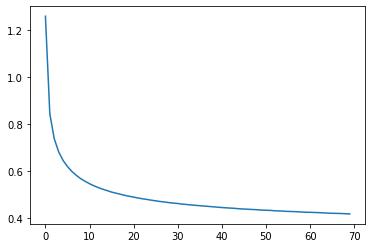

In [9]:
from matplotlib import pyplot as plt
plt.plot(running_loss)